<a href="https://colab.research.google.com/github/Deepeck05/Machine_Learning_Project/blob/main/(EDA)_on_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis (EDA) on Sales Dataset Using Python***

# *Importing Libraries*

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [19]:
sales_data=pd.read_csv('sales.csv')

# *Data Cleaning & Understanding*

In [55]:
sales_data["OrderDate"] = pd.to_datetime(sales_data["OrderDate"])

In [56]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          10 non-null     int64         
 1   ProductCategory  10 non-null     object        
 2   SalesAmount      10 non-null     int64         
 3   Profit           10 non-null     int64         
 4   CustomerSegment  10 non-null     object        
 5   Region           10 non-null     object        
 6   OrderDate        10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 692.0+ bytes


In [57]:
sales_data.describe(include='all')

,OrderID,ProductCategory,SalesAmount,Profit,CustomerSegment,Region,OrderDate
count,10.00000,10,10.000000,10.000000,10,10,10
unique,NaN,3,NaN,NaN,3,4,NaN
top,NaN,Electronics,NaN,NaN,Consumer,South,NaN
freq,NaN,4,NaN,NaN,4,3,NaN
mean,1005.50000,NaN,21250.000000,3370.000000,NaN,NaN,2024-01-19 12:00:00
min,1001.00000,NaN,4800.000000,700.000000,NaN,NaN,2024-01-05 00:00:00
25%,1003.25000,NaN,9150.000000,1425.000000,NaN,NaN,2024-01-11 06:00:00
50%,1005.50000,NaN,21500.000000,2850.000000,NaN,NaN,2024-01-19 00:00:00
75%,1007.75000,NaN,29000.000000,4900.000000,NaN,NaN,2024-01-26 12:00:00
max,1010.00000,NaN,42000.000000,7200.000000,NaN,NaN,2024-02-05 00:00:00


In [58]:
sales_data.isnull().sum()

,0
OrderID,0
ProductCategory,0
SalesAmount,0
Profit,0
CustomerSegment,0
Region,0
OrderDate,0


In [59]:
sales_data.duplicated().sum()

np.int64(0)

# *Univariate Analysis*

# *Histogram plots*

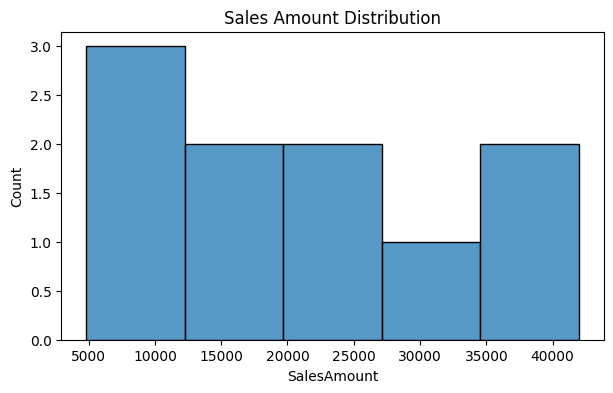

In [24]:
plt.figure(figsize=(7,4))
sns.histplot(sales_data["SalesAmount"])
plt.title("Sales Amount Distribution")
plt.show()

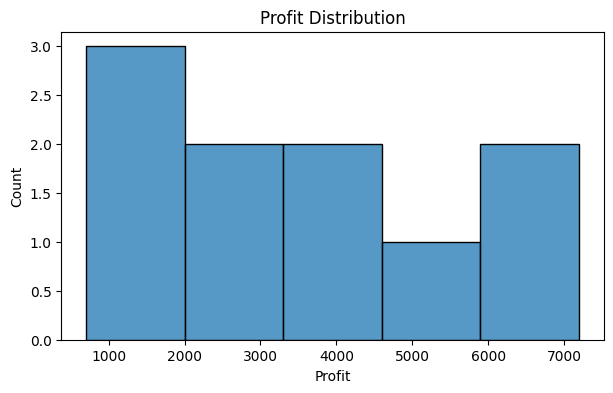

In [60]:
plt.figure(figsize=(7,4))
sns.histplot(sales_data["Profit"])
plt.title("Profit Distribution")
plt.show()

# *Bar Plot*

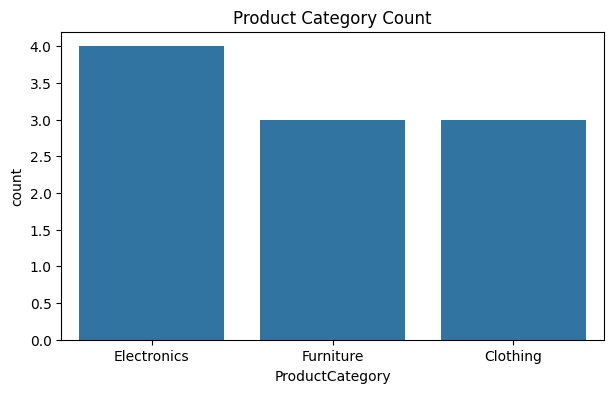

In [27]:
plt.figure(figsize=(7,4))
sns.countplot(data=sales_data, x="ProductCategory")
plt.title("Product Category Count")
plt.show()


# *Bivariate Analysis*

# *Scatter plots*

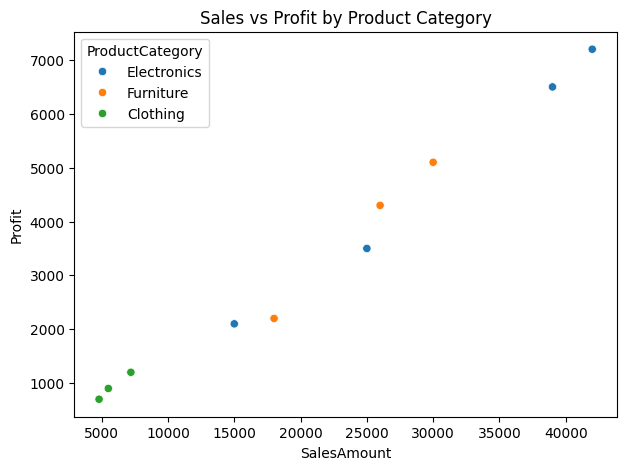

In [61]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=sales_data, x="SalesAmount", y="Profit", hue="ProductCategory")
plt.title("Sales vs Profit by Product Category")
plt.show()


# *Box plots*

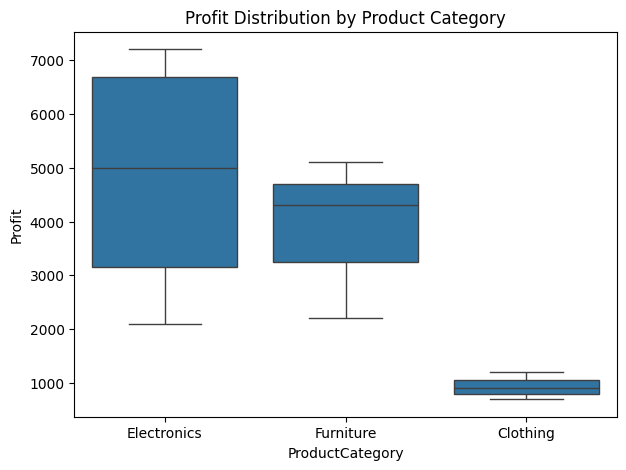

In [62]:
plt.figure(figsize=(7,5))
sns.boxplot(data=sales_data, x="ProductCategory", y="Profit")
plt.title("Profit Distribution by Product Category")
plt.show()


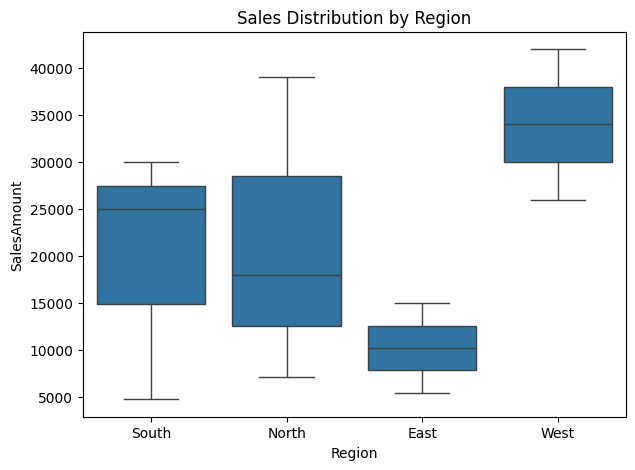

In [63]:
plt.figure(figsize=(7,5))
sns.boxplot(data=sales_data, x="Region", y="SalesAmount")
plt.title("Sales Distribution by Region")
plt.show()


# *Correlation Analysis*

In [65]:
sales_data_cpy=sales_data.copy()
label_encoder = LabelEncoder()
group=['ProductCategory','CustomerSegment','Region','OrderDate']
for i in group:
  sales_data_cpy[i] = label_encoder.fit_transform(sales_data_cpy[i])

# *Heatmap*

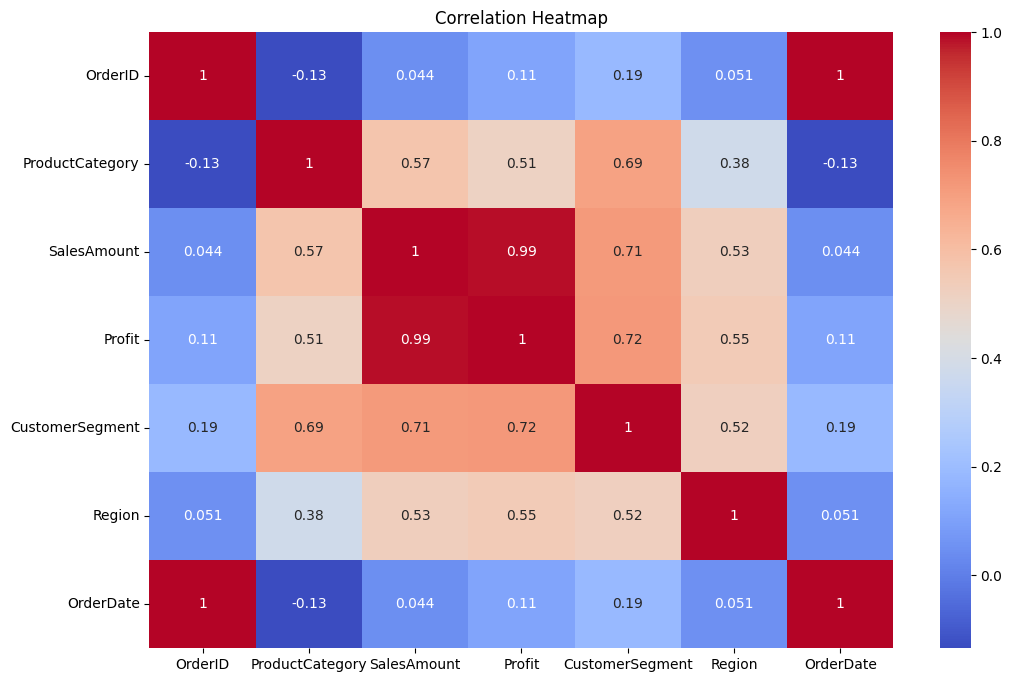

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(sales_data_cpy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# *Time Series Trend*

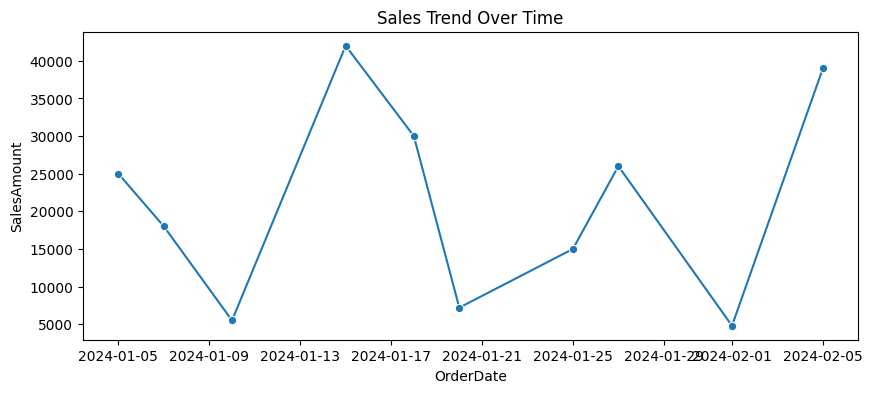

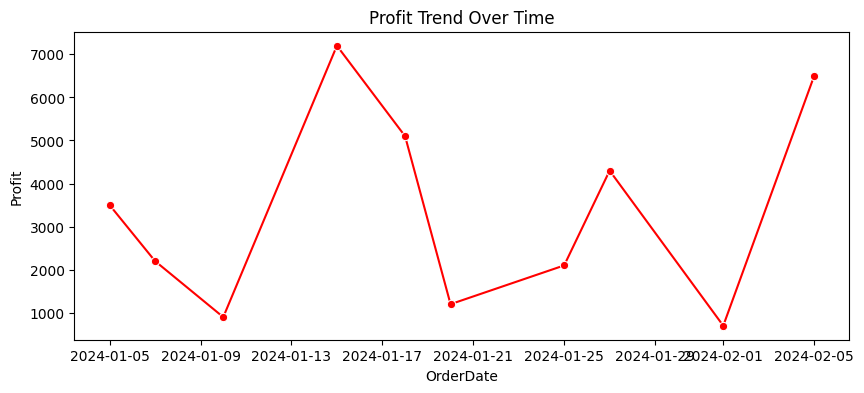

In [67]:
sales_data_sorted = sales_data.sort_values("OrderDate")

plt.figure(figsize=(10,4))
sns.lineplot(data=sales_data_sorted, x="OrderDate", y="SalesAmount", marker="o")
plt.title("Sales Trend Over Time")
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(data=sales_data_sorted, x="OrderDate", y="Profit", marker="o", color="red")
plt.title("Profit Trend Over Time")
plt.show()


# *Conclusion Derived*

In [51]:
sales_by_category = sales_data.groupby("ProductCategory")["SalesAmount"].sum()
profit_by_category = sales_data.groupby("ProductCategory")["Profit"].sum()

sales_by_region = sales_data.groupby("Region")["SalesAmount"].sum()
profit_by_region = sales_data.groupby("Region")["Profit"].sum()

print("\nSales by Product Category:")
print(sales_by_category)

print("\nProfit by Product Category:")
print(profit_by_category)

print("\nSales by Region:")
print(sales_by_region)

print("\nProfit by Region:")
print(profit_by_region)



Sales by Product Category:
ProductCategory
Clothing        17500
Electronics    121000
Furniture       74000
Name: SalesAmount, dtype: int64

Profit by Product Category:
ProductCategory
Clothing        2800
Electronics    19300
Furniture      11600
Name: Profit, dtype: int64

Sales by Region:
Region
East     20500
North    64200
South    59800
West     68000
Name: SalesAmount, dtype: int64

Profit by Region:
Region
East      3000
North     9900
South     9300
West     11500
Name: Profit, dtype: int64


# *Visualization*

# *Sales_By_Category & Profit_By_Category*

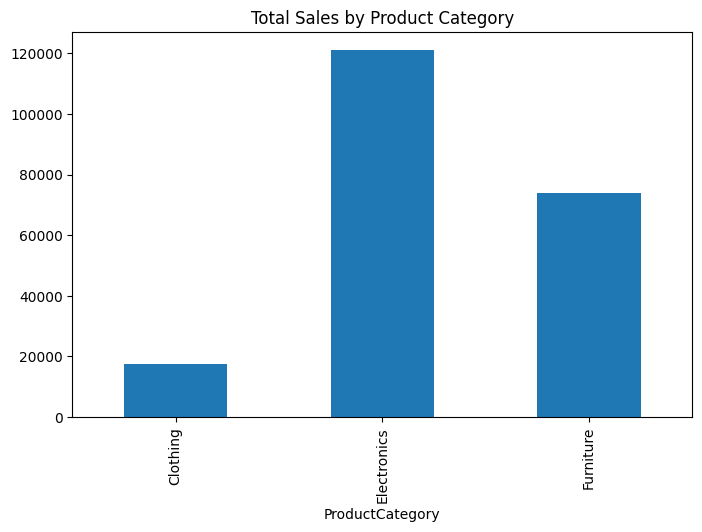

In [53]:
plt.figure(figsize=(8,5))
sales_by_category.plot(kind="bar")
plt.title("Total Sales by Product Category")
plt.show()


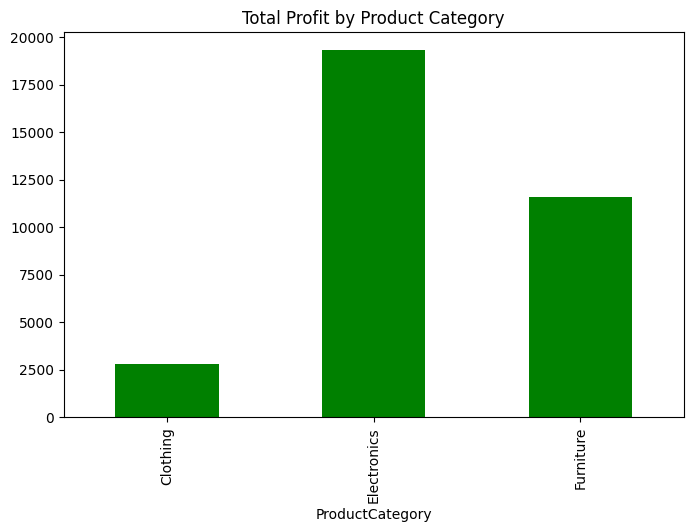

In [75]:
plt.figure(figsize=(8,5))
profit_by_category.plot(kind="bar", color='g')
plt.title("Total Profit by Product Category")
plt.show()

# *Sales_By_Region & Profit_By_Region*

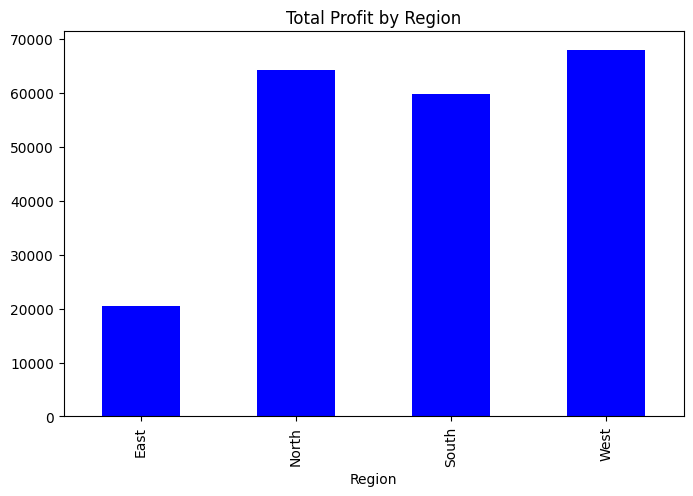

In [73]:
plt.figure(figsize=(8,5))
sales_by_region.plot(kind="bar", color="b")
plt.title("Total Profit by Region")
plt.show()

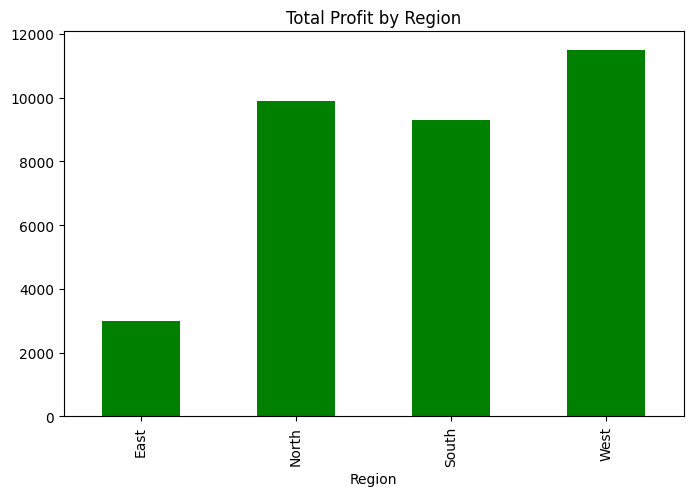

In [54]:
plt.figure(figsize=(8,5))
profit_by_region.plot(kind="bar", color="green")
plt.title("Total Profit by Region")
plt.show()